<a href="https://colab.research.google.com/github/engineerinvestor/Finance-Education/blob/main/Calculating_and_Visualizing_College_Savings_(529_Plan)_Contributions_A_Python_Tutorial_for_Future_College_Costs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculating and Visualizing College Savings (529 Plan) Contributions: A Python Tutorial for Future College Costs

Author: Engineer Investor ([@egr_investor](https://twitter.com/egr_investor))

Date: 06/11/2024

GitHub: [engineerinvestor](https://github.com/engineerinvestor)

## Introduction

This tutorial will guide you through the steps to calculate the future cost of college education and the required annual contributions to a 529 plan, given certain assumptions. We will use Python to perform the calculations and create visualizations.

### Introduction

Planning for the cost of college education is a significant financial challenge for many families. The rising costs of tuition and other expenses, compounded by inflation, necessitate careful planning and disciplined saving. One popular method for saving for college is through a 529 plan, which allows for tax-advantaged growth of contributions. To determine how much to contribute annually to a 529 plan, we need to account for both the future cost of college, adjusted for inflation, and the expected investment returns on our contributions.

This document will explain the equations used to calculate the required annual contributions to a 529 plan, and provide a step-by-step walkthrough of an example scenario.

### Equations

1. **Future Cost of College in N Years**:
   
   $C_N = C_0 \times (1 + i)^n$

   Where:
   - $ C_0 $ is the current annual cost of college.
   - $ C_N $ is the projected annual cost of college in $ N $ years.
   - $ i $ is the annual rate of inflation for college costs.
   - $ n $ is the number of years until the child starts college.

2. **Future Costs During Enrollment Years ($F$)**:
   
   $F = C_N \times (1 + i)^{k - n} \mid k \in [n, n+1, n+2, n+3] $

   Where:
   - $ k $ represents each year of college enrollment.

3. **Total Future Cost ($T$)**:
   
   $T = \sum F$
   

4. **Required Annual Contributions ($P$)**:
   
   $ P = \frac{T \times r}{(1 + r)^n - 1} $
   
   Where:
   - $ r $ is the annual investment return rate.

### Example Scenario

Assuming that college costs $60,000 per year in 2024, we want to determine how much to contribute annually to a 529 plan for a child who will start college in 18 years (2042). We assume a 5% annual investment return and a 6% annual education inflation rate. The child will spend four years in college.

1. **Calculate Future Cost of College in 18 Years**:
   
   $ C_N = \$ 60,000 \times (1 + 0.06)^{18} \approx \$171,260 $
   

2. **Calculate Future Costs During Enrollment Years**:
   
   $F = \left[ 171260 \times (1 + 0.06)^0, 171260 \times (1 + 0.06)^1, 171260 \times (1 + 0.06)^2, 171260 \times (1 + 0.06)^3 \right]$
   
   Which results in:
   
   $F = [171260, 181536, 192428, 203974]$

3. **Calculate Total Future Cost**:
   
   $ T = \$ 171,260 + \$ 181,536 + \$ 192,428 + \$ 203,974 \approx \$ 749,198$

4. **Calculate Required Annual Contributions**:

   $ P = \frac{749,198 \times 0.05}{(1 + 0.05)^{18} - 1} \approx \$ 26,631$
   
Therefore, to meet the future college costs, you should contribute approximately $26,631 annually to the 529 plan.

### Conclusion

By understanding and applying these equations, families can plan and save effectively for future college expenses. This ensures that they are financially prepared for the rising costs of higher education. In our example, contributing about $26,631 annually will help cover the projected college expenses in 18 years, given the assumed inflation and investment return rates.



## Code

## Install necessary packages

In [90]:
!pip -q install numpy matplotlib seaborn

## Import libraries

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List

## User-defined parameters

Adjust these parameters to fit you personal situation.

In [92]:
# Parameters
C_0 = 60000  # Current annual cost of college
i = 0.06     # Annual education inflation rate
n = 18       # Number of years until enrollment
r = 0.05     # Annual investment return rate

## Calculations

In [93]:
# Calculate future cost of college in 18 years
C_N = C_0 * (1 + i)**n

In [94]:
# Calculate future costs during enrollment years
years = np.arange(n, n+4)
future_costs = [C_N * (1 + i)**(k - n) for k in years]

In [95]:
# Total future cost
total_cost = sum(future_costs)

# Calculate required annual contributions
P = total_cost * r / ((1 + r)**n - 1)

## Results

In [96]:
# Print results
print(f"Future annual costs of college ($): {np.round(future_costs)}")
print(f"Total future cost for four years of college: ${total_cost:,.2f}")
print(f"Required annual contributions to 529 plan: ${P:,.2f}")

Future annual costs of college ($): [171260. 181536. 192428. 203974.]
Total future cost for four years of college: $749,198.26
Required annual contributions to 529 plan: $26,631.17


## Create function

In [100]:
def calculate_annual_contributions(inflation_rate: float = 0.06,
                                   investment_return: float = 0.05,
                                   n: int = 18,
                                   C_0: float = 60000) -> float:
    """
    Calculate the required annual contributions to save for college, given an inflation rate, investment return rate,
    number of years until college starts, and the current annual cost of college.

    Parameters:
    inflation_rate (float): The annual inflation rate for college costs (as a decimal, e.g., 0.03 for 3%).
    investment_return (float): The annual investment return rate (as a decimal, e.g., 0.07 for 7%).
    n (int): The number of years until college starts.
    C_0 (float): The current annual cost of college.

    Returns:
    float: The required annual contributions to meet the future college costs.
    """

    # Calculate future cost of college in N years
    C_N = C_0 * (1 + inflation_rate)**n

    # Calculate future costs during enrollment years
    future_costs: List[float] = [C_N * (1 + inflation_rate)**(k - n) for k in range(n, n + 4)]

    # Total future cost
    total_cost = sum(future_costs)

    # Calculate required annual contributions
    P = total_cost * investment_return / ((1 + investment_return)**n - 1)

    return P

In [109]:
# Example usage
annual_contribution = calculate_annual_contributions(inflation_rate, investment_return, n, C_0)
print(f"Required annual contribution: ${annual_contribution:.2f}")

Required annual contribution: $26631.17


## Visualization

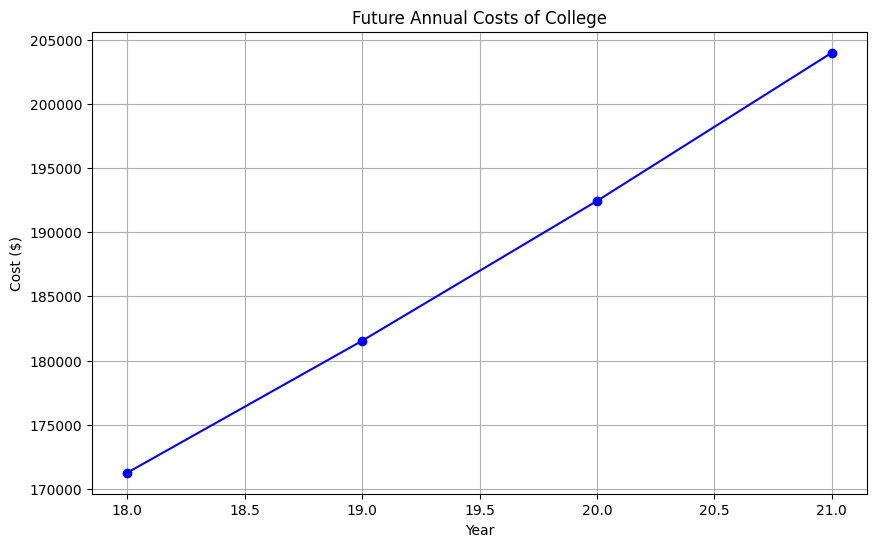

In [97]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(years, future_costs, marker='o', linestyle='-', color='b')
plt.title('Future Annual Costs of College')
plt.xlabel('Year')
plt.ylabel('Cost ($)')
plt.grid(True)
plt.show()

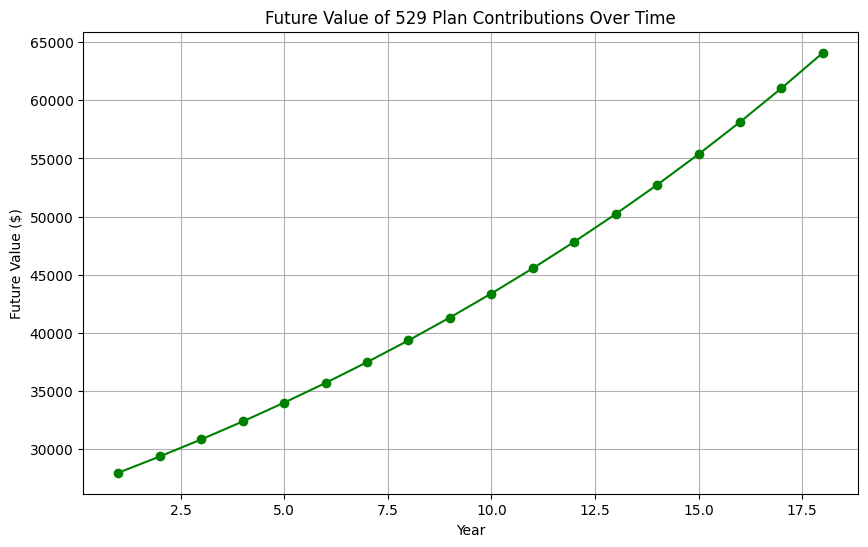

In [98]:
# Visualization of required contributions
years_contributions = np.arange(1, n + 1)
future_value_annuity = [(P * (1 + r)**k) for k in years_contributions]

plt.figure(figsize=(10, 6))
plt.plot(years_contributions, future_value_annuity, marker='o', linestyle='-', color='g')
plt.title('Future Value of 529 Plan Contributions Over Time')
plt.xlabel('Year')
plt.ylabel('Future Value ($)')
plt.grid(True)
plt.show()

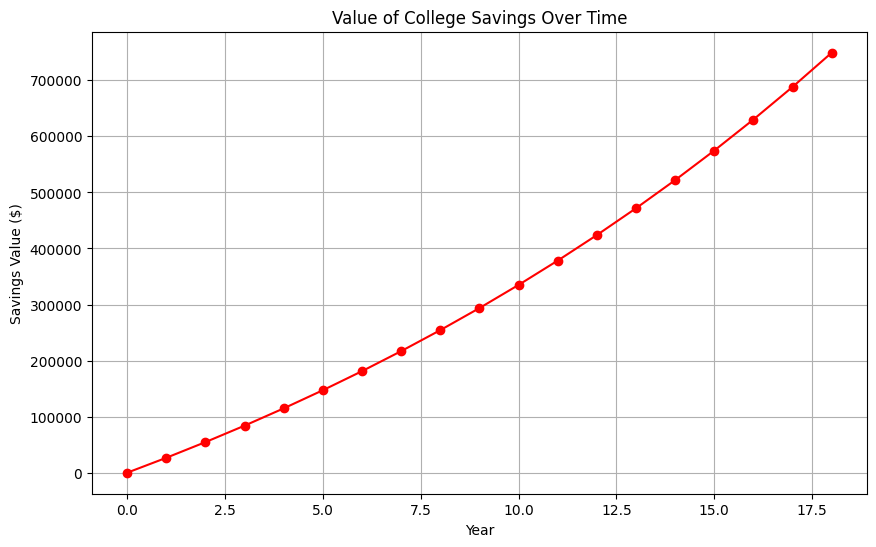

In [99]:
# Visualization of college savings over time
savings_value = [P * ((1 + r)**t - 1) / r for t in range(n + 1)]
plt.figure(figsize=(10, 6))
plt.plot(np.arange(n + 1), savings_value, marker='o', linestyle='-', color='r')
plt.title('Value of College Savings Over Time')
plt.xlabel('Year')
plt.ylabel('Savings Value ($)')
plt.grid(True)
plt.show()

### Required Annual Contributions vs. Inflation Rates

In [102]:
# Calculate required annual contributions for inflation rates from 0% to 8% in steps of 1%
inflation_rates = np.arange(0, 0.09, 0.01)
annual_contributions = [calculate_annual_contributions(i) for i in inflation_rates]

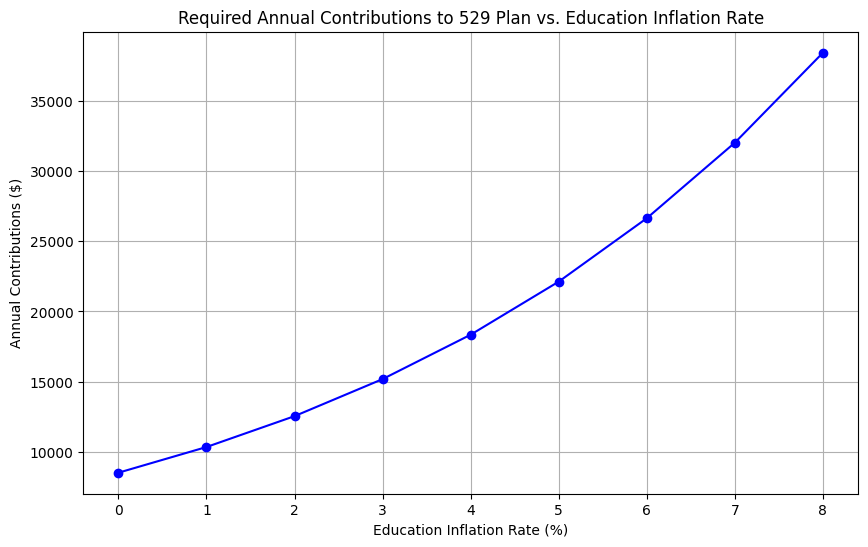

In [103]:
# Plotting the required annual contributions as a function of education inflation rate
plt.figure(figsize=(10, 6))
plt.plot(inflation_rates * 100, annual_contributions, marker='o', linestyle='-', color='b')
plt.title('Required Annual Contributions to 529 Plan vs. Education Inflation Rate')
plt.xlabel('Education Inflation Rate (%)')
plt.ylabel('Annual Contributions ($)')
plt.grid(True)
plt.show()

### Education Inflation and Investment Return Heatmap

In [104]:
# Define the range of inflation rates and investment returns
inflation_rates = np.arange(0, 0.09, 0.01)
investment_returns = np.arange(0.03, 0.08, 0.01)

# Calculate the required annual contributions for each combination of inflation rate and investment return
contributions = np.array([[calculate_annual_contributions(i, r) for r in investment_returns] for i in inflation_rates])

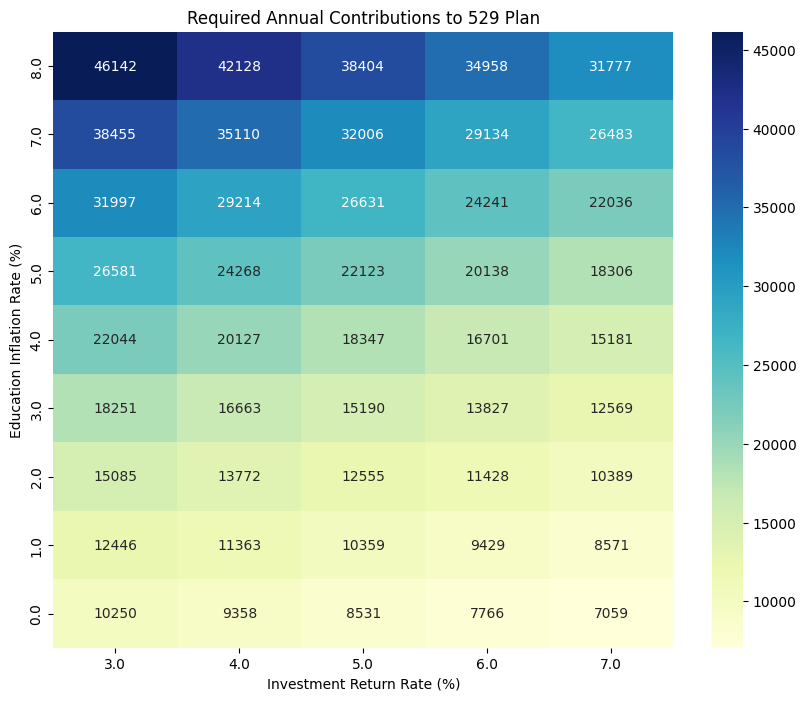

In [105]:
# Create the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(contributions, annot=True, fmt=".0f", xticklabels=np.round(investment_returns * 100), yticklabels=np.round(inflation_rates * 100), cmap="YlGnBu")
ax.invert_yaxis() # Apply ax.invert_yaxis() to invert the y-axis
plt.title('Required Annual Contributions to 529 Plan')
plt.xlabel('Investment Return Rate (%)')
plt.ylabel('Education Inflation Rate (%)')
plt.show()